In [ ]:
#import modules
from keras.layers import Conv2D , Dense , Flatten, MaxPooling2D , Dropout
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.applications.xception import decode_predictions
import tensorflow as tf
import keras
from keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
%cd clothing-dataset-small

/content/clothing-dataset-small


In [ ]:
test='/content/clothing-dataset-small/test'
train="/content/clothing-dataset-small/train"
validation="/content/clothing-dataset-small/validation"

In [ ]:
##Data Filtering
!rm -rf /content/clothing-dataset-small/train/skirt
!rm -rf /content/clothing-dataset-small/train/longsleeve
!rm -rf /content/clothing-dataset-small/train/shorts
!rm -rf /content/clothing-dataset-small/train/outwear
!rm -rf /content/clothing-dataset-small/train/hat
!rm -rf /content/clothing-dataset-small/validation/skirt
!rm -rf /content/clothing-dataset-small/validation/longsleeve
!rm -rf /content/clothing-dataset-small/validation/shorts
!rm -rf /content/clothing-dataset-small/validation/outwear
!rm -rf /content/clothing-dataset-small/validation/hat
!rm -rf /content/clothing-dataset-small/test/longsleeve
!rm -rf /content/clothing-dataset-small/test/shorts
!rm -rf /content/clothing-dataset-small/test/outwear
!rm -rf /content/clothing-dataset-small/test/hat
!rm -rf /content/clothing-dataset-small/test/.ipynb_checkpoints
!rm -rf /content/clothing-dataset-small/test/skirt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale= 1./255)
train_data = datagen.flow_from_directory(
    train,
    target_size = (299,299),
    batch_size=16,
)
print("classes:", train_data.class_indices)
img, labels = train_data.next()

Found 1992 images belonging to 5 classes.
classes: {'dress': 0, 'pants': 1, 'shirt': 2, 'shoes': 3, 't-shirt': 4}


In [ ]:
test_data = datagen.flow_from_directory(
    test,
    target_size = (299,299),
    batch_size=16
)
print("classes:", test_data.class_indices)
img, labels = test_data.next()

validation_data = datagen.flow_from_directory(
    validation,
    target_size = (299,299),
    batch_size=16)
print("classes:", validation_data.class_indices)
img, labels = validation_data.next()

Found 208 images belonging to 5 classes.
classes: {'dress': 0, 'pants': 1, 'shirt': 2, 'shoes': 3, 't-shirt': 4}
Found 217 images belonging to 5 classes.
classes: {'dress': 0, 'pants': 1, 'shirt': 2, 'shoes': 3, 't-shirt': 4}


In [ ]:
import numpy as np
#defining the number of classes
num_classes=5

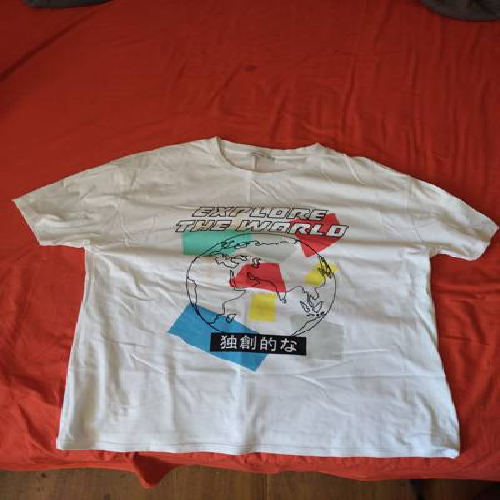

In [ ]:
tshirt = Image.open("/content/clothing-dataset-small/train/t-shirt/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg")
tshirt = tshirt.resize((500,500), resample=Image.NEAREST)
tshirt

In [ ]:
from tensorflow.keras import Sequential
def clothes (dr = 0.2 , lr = 0.001 , act = "relu"):
  model=Sequential()
  model.add(Conv2D(64, (3,3),
                   activation= act))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(128, (3,3),
                   activation=act))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(256, (3,3),
                   activation= act))
  model.add(MaxPooling2D(pool_size=(2,2)))




  # Flatten the input data
  model.add(Flatten())
  #Adding Dense Layer and Dropout Layer
  model.add(Dense(256, activation= act))
  model.add(Dropout(dr))

  model.add(Dense(128, activation= act))
  model.add(Dropout(dr))

  model.add(Dense(64, activation=act))
  model.add(Dropout(dr))

  # Add output layer
  model.add(Dense(num_classes, activation='softmax'))


  #Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(lr),
                metrics=['accuracy'])

  return model

In [ ]:
model=clothes()
epochs = 10
history = model.fit(train_data, batch_size=10, epochs=epochs, validation_data=validation_data)

Epoch 1/10
125/125 [==============================] - 1249s 10s/step - loss: 1.5949 - accuracy: 0.3850 - val_loss: 1.4395 - val_accuracy: 0.4424
Epoch 2/10
125/125 [==============================] - 1259s 10s/step - loss: 1.2230 - accuracy: 0.5387 - val_loss: 1.0819 - val_accuracy: 0.5253
Epoch 3/10
125/125 [==============================] - 1242s 10s/step - loss: 0.9947 - accuracy: 0.6130 - val_loss: 1.1055 - val_accuracy: 0.5806
Epoch 4/10
125/125 [==============================] - 1219s 10s/step - loss: 0.7762 - accuracy: 0.7108 - val_loss: 0.9262 - val_accuracy: 0.7005
Epoch 5/10
125/125 [==============================] - 1223s 10s/step - loss: 0.6121 - accuracy: 0.7796 - val_loss: 0.8580 - val_accuracy: 0.7235
Epoch 6/10
125/125 [==============================] - 1222s 10s/step - loss: 0.4647 - accuracy: 0.8343 - val_loss: 0.9208 - val_accuracy: 0.7373
Epoch 7/10
125/125 [==============================] - 1223s 10s/step - loss: 0.3029 - accuracy: 0.8981 - val_loss: 1.2289 - val_ac

In [ ]:
# Evaluate the model
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 [==============================] - 33s 3s/step - loss: 2.3667 - accuracy: 0.6923
Test loss: 2.366730213165283
Test accuracy: 0.692307710647583


In [ ]:
predictions = model.predict(test_data)
print(predictions)

13/13 [==============================] - 33s 3s/step
[[8.82379636e-02 1.80390775e-01 9.03681357e-05 7.31234729e-01
  4.60956544e-05]
 [1.38484985e-01 5.21877743e-02 8.61142650e-02 6.48807585e-02
  6.58332288e-01]
 [6.82164505e-02 7.59544730e-01 1.16888180e-01 2.46387497e-02
  3.07119209e-02]
 ...
 [7.28679355e-04 9.99207556e-01 1.31672368e-05 3.71984388e-05
  1.34251959e-05]
 [6.90068816e-07 1.29582012e-10 4.62298255e-10 9.99999225e-01
  1.03713464e-08]
 [7.14428397e-03 8.42256963e-01 1.60704090e-04 1.48486435e-01
  1.95156154e-03]]


In [ ]:
#getting an idea of the labels
labels

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.3 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
name = train_data.class_indices.keys()
name

dict_keys(['dress', 'pants', 'shirt', 'shoes', 't-shirt'])

In [ ]:
def predict_img(img):
  img_3d = img.reshape(-1,299,299,3)
  pridiction = model.predict(img_3d)[0]
  return {name[i]: float(pridiction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(299,299))
label = gr.outputs.Label(num_top_classes=5)

<ipython-input-21-9cef30198680>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(299,299))
<ipython-input-21-9cef30198680>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(299,299))
<ipython-input-21-9cef30198680>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=5)
<ipython-input-21-9cef30198680>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=5)


In [ ]:
web=gr.Interface(fn= predict_img,inputs= image, outputs= label , capture_session = True)
web.launch(share ='True' )

<ipython-input-22-1a367feb2dbc>:1: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  web=gr.Interface(fn= predict_img,inputs= image, outputs= label , capture_session = True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b51f62f80c018c7c61.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
